In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1.Datasets

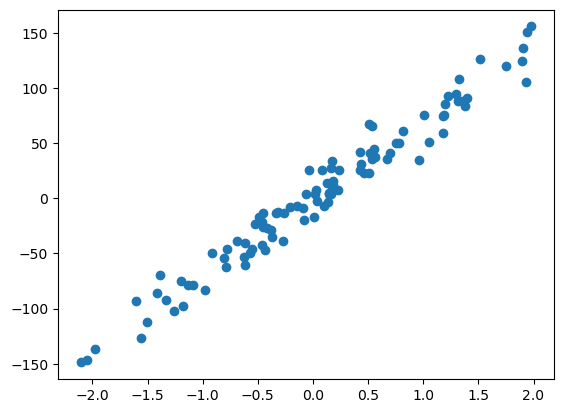

In [3]:
x,y = make_regression(n_samples = 100, n_features = 2 , noise = 10)
#y = y + abs(y/3)

plt.scatter(x[:,0],y) #afficher les resultats, x en abscisse et y en ordonnée 

In [4]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [5]:
# Creations de la matrice X, inclut le biais
X = np.concatenate((x, np.ones((x.shape[0],1))), axis = 1)
#X = np.concatenate((x**2, X), axis = 1)
print(X.shape)

(100, 3)


In [53]:
print(X)

[[ 6.74330310e-01  8.21176175e-01  1.00000000e+00]
 [ 8.40597218e-02 -2.89930546e-01  1.00000000e+00]
 [ 5.05669809e-02 -2.24871032e-01  1.00000000e+00]
 [ 5.54141545e+00 -2.35402112e+00  1.00000000e+00]
 [ 5.26532978e-01  7.25625921e-01  1.00000000e+00]
 [ 3.29824875e-03  5.74303818e-02  1.00000000e+00]
 [ 3.24438019e-01 -5.69594609e-01  1.00000000e+00]
 [ 1.24388692e-01 -3.52687810e-01  1.00000000e+00]
 [ 5.86817986e-02 -2.42243263e-01  1.00000000e+00]
 [ 1.27213593e-01  3.56670146e-01  1.00000000e+00]
 [ 4.79396228e-01 -6.92384451e-01  1.00000000e+00]
 [ 1.10630909e+00  1.05181229e+00  1.00000000e+00]
 [ 1.77265536e+00  1.33141104e+00  1.00000000e+00]
 [ 9.29961999e-01 -9.64345373e-01  1.00000000e+00]
 [ 8.17697592e-01  9.04266328e-01  1.00000000e+00]
 [ 7.29810651e-01 -8.54289559e-01  1.00000000e+00]
 [ 4.95789345e-01  7.04123104e-01  1.00000000e+00]
 [ 8.10125373e-01  9.00069649e-01  1.00000000e+00]
 [ 6.36965323e-03 -7.98101073e-02  1.00000000e+00]
 [ 1.27439944e-01  3.56987316e-

In [6]:
# Initialisation du vecteur theta aléatoire
theta = np.random.randn(3,1)
print(theta.shape)
print(theta)

(3, 1)
[[-1.00456723]
 [ 0.25447398]
 [-0.41607679]]


## 2. Modèle Lineaire
On implémente un modèle $F=X.\theta$, puis on teste le modèle pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modèle initial, défini par la valeur de theta.

In [7]:
def model(X,theta):
    return X.dot(theta)

In [8]:
model(X,theta)

array([[ 1.01492207e+00],
       [-7.18657674e-02],
       [-3.49544950e-01],
       [-7.10144480e-01],
       [-2.95118395e-01],
       [ 1.73967816e-02],
       [-1.55986073e+00],
       [-1.58030120e+00],
       [ 2.32698472e-01],
       [-6.69976351e-02],
       [-2.08128276e+00],
       [-1.07424361e+00],
       [-9.43183728e-01],
       [ 7.25090518e-01],
       [ 1.30773505e+00],
       [-1.20756199e+00],
       [ 1.61359120e+00],
       [-1.56370921e+00],
       [-7.62853027e-01],
       [-1.61805505e+00],
       [-1.51099308e+00],
       [-1.12742114e+00],
       [-2.41519949e+00],
       [ 1.41961754e+00],
       [ 1.73811244e-01],
       [-6.43217821e-01],
       [ 1.08494742e+00],
       [-3.79261383e-01],
       [-5.31781499e-01],
       [-1.17789544e+00],
       [-1.26501012e+00],
       [ 7.80274522e-01],
       [-8.47961955e-01],
       [-2.15308392e+00],
       [-1.17469846e-01],
       [ 8.88929229e-01],
       [-1.23016200e+00],
       [ 4.48723471e-01],
       [-1.6

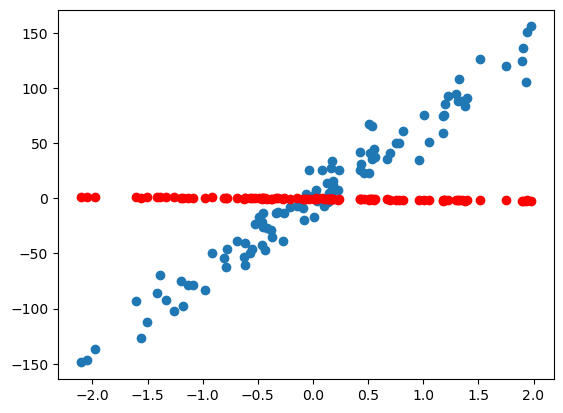

In [9]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], model(X,theta) , c ='red')

## 3. Fonction coût : Erreur Quadratique moyenne
On mesure les erreurs du modèle sur le Dataset X,y en implémentant l'erreur qudratique moyenne, $Mean Squared Error (MSE)$ en anglais.

$J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^{2}$

Ensuite, on teste notre foonction, pour voir s'il n'y a pas de bug

In [10]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta) - y)**2)

In [11]:
cost_function(X,y,theta)

2328.5583529066116

## 4. Gradient et Descente de Gradient
On implémente la formule du gradient pour la $MSE$

$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^{T}.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient :

$\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$

In [12]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [13]:
def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # Création dun nouveau tableau de stockage pour enregistrer l'évolution du cout du modèle
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate*grad(X,y,theta) # Mise a jour parapmètre theta (formule du gradient descent)
        cost_history[i] = cost_function(X,y,theta) # On enrégistre la valeur du Cout au tour i dans la cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entraînement 
On definit un nombre d'iterations, ainsi qu'un pas d'apprentissage $\alpha$, et c'est partit !

Une fois le modele entraîné, on observe les resultats par rapport a notre dataset

In [14]:
n_iterations = 1000
learning_rate = 0.01

theta_final , cost_history = gradient_descent(X,y, theta, learning_rate, n_iterations )

In [15]:
print(theta_final) #Voici les parametres du modele une fois que la machine a été entaîné

[[67.44519791]
 [ 8.41311961]
 [-0.37525722]]


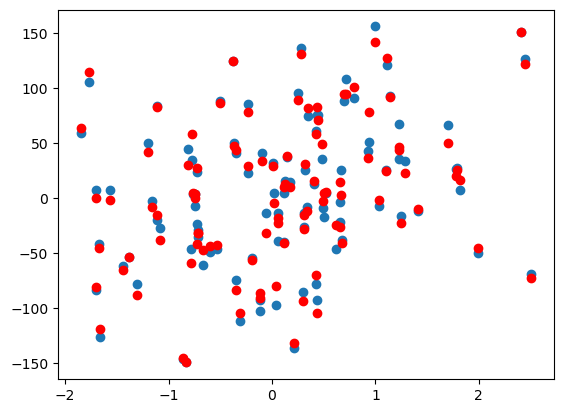

In [17]:
#Création d'un vecteur prédictions qui contient les prédictions de notre modele final
prediction = model(X, theta_final)

# Affiche les resultats de prédictions (en rouge) par rapport a notre dataset (en bleu)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1], prediction, c = 'r')

## 6. Courbe d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction coût a travers les iterations. On esr sensé obtenir une courbe qui diminue a chaque iterations jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas $\textbf{learning_rate}$ est peut être trop élevé. Il faut prendre un pas plus faible.

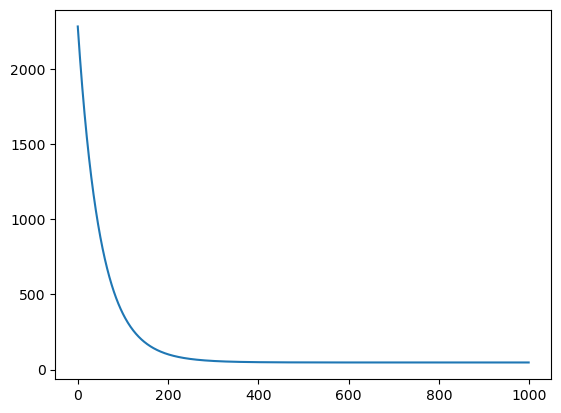

In [18]:
plt.plot(range(n_iterations), cost_history)

## 7. Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, collegues) on peut utiliser le $\textbf{Coefficient de détermination}$, aussi connu sous le nom de $R^{2}$. Il nous vient de la méthodes des moindres carrées

In [19]:
def coef_determination(y , pred):
    u = ((y-pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1-u/v

In [20]:
coef_determination(y , prediction)

0.9791682258620642

<IPython.core.display.Javascript object>


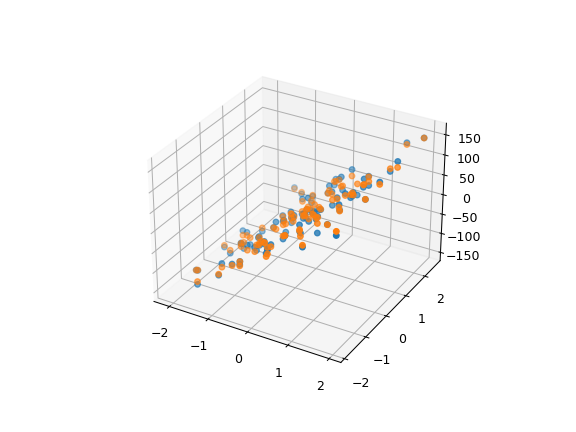

In [23]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0] , x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)